In [1]:
import train_embeddings
import matplotlib.pyplot as plt
import sentence_features
import pickle
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
word2vec_path = "../data/models/word2vec/word2vecGensim_sw_cbow.bin"
word2vec = train_embeddings.load_word2vec_model(word2vec_path)
mapped_reports_path = "../data/processed/processed_reports/preprocessed_replace_sw"
# mapped_reports_path = "../data/processed/preprocessed_findings_replace_sw"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))

In [3]:
pipeline = make_pipeline(train_embeddings.WordVectorizer(word2vec), sentence_features.ReportVectorAverager(granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)
#data = pipeline.transform(mapped_reports)

In [ ]:
split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

In [ ]:
sgd_clf = SGDClassifier()
clf = sentence_features.SentenceBasedClassifier(sgd_clf)
clf.fit(trainingX, trainingY)

In [ ]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [4]:
# Now try FastText
fastText_path = "../data/models/fastText/fastText_sw_cbow.bin"
ft = train_embeddings.load_fastText_model(fastText_path)

In [5]:
pipeline = make_pipeline(train_embeddings.FastTextReportVectorizer(ft, granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([27709, 17109]))
(array([0, 1]), array([7059, 4146]))


In [6]:
sgd_clf = SGDClassifier()
clf = sentence_features.SentenceBasedClassifier(sgd_clf)
clf.fit(trainingX, trainingY)

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


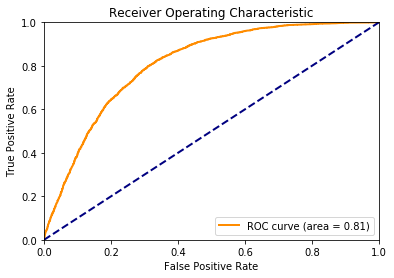

In [7]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN for fastText
knn_clf = KNeighborsClassifier(n_neighbors=8)
clf = sentence_features.SentenceBasedClassifier(knn_clf, use_prob_func=True)
clf.fit(trainingX, trainingY)

y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# fastText with Findings and Impressions
mapped_reports_path = "../data/processed/processed_reports/preprocessed_findings_replace_sw"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))


pipeline = make_pipeline(train_embeddings.FastTextReportVectorizer(ft, granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

In [ ]:
sgd_clf = SGDClassifier()
clf = sentence_features.SentenceBasedClassifier(sgd_clf)
clf.fit(trainingX, trainingY)

y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
# fastText Random Forests
mapped_reports_path = "../data/processed/processed_reports/preprocessed_replace_sw"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))

pipeline = make_pipeline(train_embeddings.FastTextReportVectorizer(ft, granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([27834, 16984]))
(array([0, 1]), array([6934, 4271]))


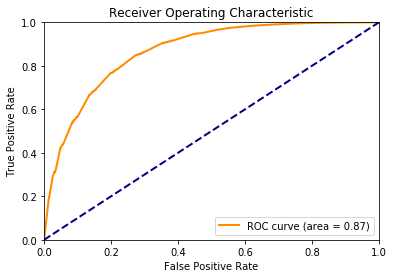

In [9]:
rf_clf = RandomForestClassifier(n_estimators=16)
clf = sentence_features.SentenceBasedClassifier(rf_clf, use_prob_func=True)
clf.fit(trainingX, trainingY)

y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Iteration 1, loss = 0.58341090
Iteration 2, loss = 0.55923235
Iteration 3, loss = 0.55130859
Iteration 4, loss = 0.54593928
Iteration 5, loss = 0.54194806
Iteration 6, loss = 0.53823045
Iteration 7, loss = 0.53536873
Iteration 8, loss = 0.53260328
Iteration 9, loss = 0.53030488
Iteration 10, loss = 0.52809037
Iteration 11, loss = 0.52606201
Iteration 12, loss = 0.52394519
Iteration 13, loss = 0.52210666
Iteration 14, loss = 0.52068727
Iteration 15, loss = 0.51888563
Iteration 16, loss = 0.51757721
Iteration 17, loss = 0.51609002
Iteration 18, loss = 0.51478120
Iteration 19, loss = 0.51323172
Iteration 20, loss = 0.51201430
Iteration 21, loss = 0.51086260
Iteration 22, loss = 0.50976063
Iteration 23, loss = 0.50847758
Iteration 24, loss = 0.50735546
Iteration 25, loss = 0.50630182
Iteration 26, loss = 0.50525003
Iteration 27, loss = 0.50422086
Iteration 28, loss = 0.50294643
Iteration 29, loss = 0.50238411
Iteration 30, loss = 0.50153062
Iteration 31, loss = 0.50044471
Iteration 32, los

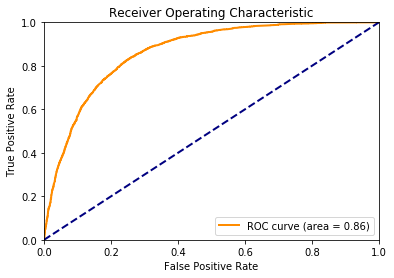

In [11]:
# MLP for fastText
mlp_clf = MLPClassifier(verbose=True, hidden_layer_sizes=(64))
clf = sentence_features.SentenceBasedClassifier(mlp_clf, use_prob_func=True)
clf.fit(trainingX, trainingY)

y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
# Random Forests with Findings and Impressions
mapped_reports_path = "../data/processed/processed_reports/preprocessed_findings_replace_sw"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))

pipeline = make_pipeline(train_embeddings.FastTextReportVectorizer(ft, granularity="sentence"), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([27770, 17179]))
(array([0, 1]), array([6993, 4245]))


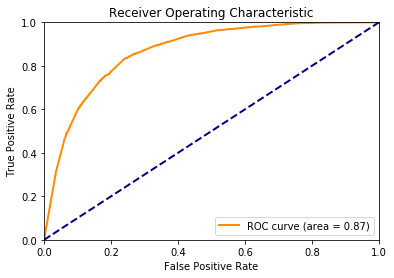

In [13]:
rf_clf = RandomForestClassifier(n_estimators=16)
clf = sentence_features.SentenceBasedClassifier(rf_clf, use_prob_func=True)
clf.fit(trainingX, trainingY)

y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
# MLP for fastText with Findings and Impressions
mlp_clf = MLPClassifier(verbose=True, hidden_layer_sizes=(64), alpha=0.0005)
clf = sentence_features.SentenceBasedClassifier(mlp_clf, use_prob_func=True)
clf.fit(trainingX, trainingY)

y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Iteration 1, loss = 0.62933686
Iteration 2, loss = 0.61285011
Iteration 3, loss = 0.60616407
Iteration 4, loss = 0.60195403
Iteration 5, loss = 0.59835958
Iteration 6, loss = 0.59574655
Iteration 7, loss = 0.59337032
Iteration 8, loss = 0.59140908
Iteration 9, loss = 0.58960820
Iteration 10, loss = 0.58798669
Iteration 11, loss = 0.58655923
Iteration 12, loss = 0.58527087
Iteration 13, loss = 0.58413693
Iteration 14, loss = 0.58285652
Iteration 15, loss = 0.58184377
Iteration 16, loss = 0.58087502
Iteration 17, loss = 0.58007482
Iteration 18, loss = 0.57931250
Iteration 19, loss = 0.57842710
Iteration 20, loss = 0.57777913
Iteration 21, loss = 0.57701556
Iteration 22, loss = 0.57626161
Iteration 23, loss = 0.57583260
Iteration 24, loss = 0.57518626
Iteration 25, loss = 0.57441450
Iteration 26, loss = 0.57392875
Iteration 27, loss = 0.57329934
Iteration 28, loss = 0.57291350
Iteration 29, loss = 0.57240852
Iteration 30, loss = 0.57175414
Iteration 31, loss = 0.57140833
Iteration 32, los

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/scott/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-b75a3b578bfb>", line 6, in <module>
    y_score = clf.decision_function(testingX)
  File "/Users/scott/Documents/ucsf/report_categorization/src/sentence_features.py", line 36, in decision_function
    class_probs = self.model.predict_proba(report)
  File "/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py", line 1050, in predict_proba
    y_pred = self._predict(X)
  File "/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py", line 678, in _predict
    self._forward_pass(activations)
  File "/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py", line 105, in _forward_pass
    self.coefs_[i])
  File "/Users/scott/anaconda3

KeyboardInterrupt: 